In [1]:
import sys
import gym
import numpy as np
import random
import math
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

In [2]:
#create an instance of CliffWalking environment
env = gym.make('CliffWalking-v0')

In [3]:
print("Actions_space: {0}".format(env.action_space))
print("State Space: {0}".format(env.observation_space))
print("Action Space (env.action_space.n) {0}: ".format(env.action_space.n))

Actions_space: Discrete(4)
State Space: Discrete(48)
Action Space (env.action_space.n) 4: 


In [4]:
def epsilon_greedy(Q, state, nA, eps):
    if random.random() > eps:
        return np.argmax(Q[state])
    else:
        return random.choice(np.arange(nA))

""" 
def update_Q_expected_sarsa(alpha, gamma, Q, \
                          eps, nA,\
                          state, action, reward, next_state=None):
    
    current = Q[state][action]
    
    #construct an epsilon-greedy policy
    policy_s = np.ones(nA) * ( eps / nA) #epsilon-greedy strategy for equiprobable selection
    policy_s[np.argmax(Q[state])] = 1 - eps + ( eps /nA) # epsilon-greedy strategy for greedy selection
    
    #In case of Expected SARSA , each state_action  is multiplied with the probability
    next_reward =  np.dot(Q[next_state] , policy_s)
    
    target = reward + gamma * next_reward
    
    new_current_reward = current + (alpha * ( target - current))
    
    return new_current_reward

"""

def update_Q_expected_sarsa(alpha, gamma, Q, nA, eps, state,action, reward, next_state=None):
    #print("The state is : {0}".format(state))
    #print("The action  is : {0}".format(action))
    current = Q[state][action]

    policy_s = get_probs(Q, eps, nA)
    Qsa_next = np.dot(Q[next_state] , policy_s)
    
    target = reward + gamma * Qsa_next
    
    new_value = current + (alpha * (target - current))
    
    return new_value
    
    

def get_probs(Q, epsilon, nA):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(nA) * (epsilon / nA)
    greedy_action = np.argmax(Q)
    policy_s[greedy_action] = 1 - epsilon + (epsilon / nA)
    return policy_s

In [ ]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0,plot_every=100):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    
    tmp_scores = deque(maxlen=plot_every)
    avg_scores = deque(maxlen=num_episodes)
    
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
 
        eps = 0.05
        state = env.reset()
        score = 0 

                
        while True:
            action = epsilon_greedy(Q, state, env.nA, eps )
            
            next_state, reward, done, info = env.step(action)
            score += reward
            Q[state][action] = update_Q_expected_sarsa(alpha, gamma, Q, env.nA, eps, state,action, reward, next_state)
            state = next_state
            
            if done:
                tmp_scores.append(score)    # append score
                break
                
        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
            
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))
    return Q

In [11]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0,max_steps_per_episode=100):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    
    tmp_scores = deque(maxlen=max_steps_per_episode)
    avg_scores = deque(maxlen=num_episodes)
    
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
 
        eps = 0.05
        state = env.reset()
        score = 0     
        
        for step in range(max_steps_per_episode): 
            action = epsilon_greedy(Q, state, env.nA, eps )
            
            next_state, reward, done, info = env.step(action)
            score += reward
            Q[state][action] = update_Q_expected_sarsa(alpha, gamma, Q, env.nA, eps, state,action, reward, next_state)
            state = next_state
            
            if done:
                tmp_scores.append(score)    # append score
                break
                
        if (i_episode % max_steps_per_episode == 0):
            avg_scores.append(np.mean(tmp_scores))
            
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % max_steps_per_episode)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % max_steps_per_episode), np.max(avg_scores))
    return Q

Episode 10000/10000

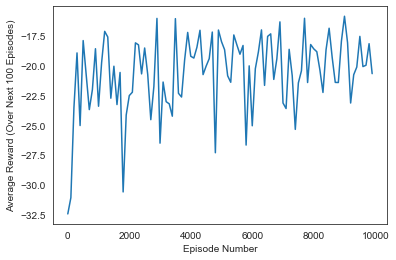

Best Average Reward over 100 Episodes:  -15.91


**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  1  1  1  1  1  1  1  1  0  1  2]
 [ 1  1  1  1  1  1  1  0  1  1  1  2]
 [ 0  0  0  0  0  0  0  0  0  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


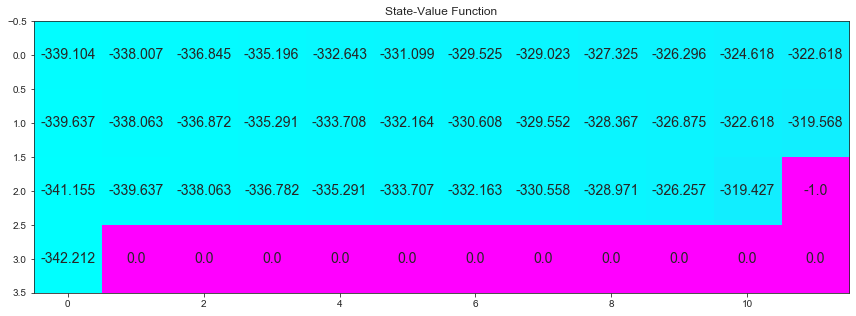

In [12]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])